## The Data

The first dataset is one from kaggle (https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset), comprised of recent real estate listings from across the United States.

In [13]:
# !pip install geopy

In [1]:
import pandas as pd
import missingno as msno
import geopy
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

In [2]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [3]:
from sklearn.preprocessing import LabelEncoder

In [17]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [56]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [9]:
# Jupyter
#RunMode = 'Jupyter'
#first_df = pd.read_csv("./datasets/realtor-data.csv")

# Google Colab
#RunMode = 'Collab'
first_df = pd.read_csv("./data/realtor-data.csv")

first_df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [10]:
first_df['sold_date'] = pd.to_datetime(first_df['sold_date'],
                                format = '%Y-%m-%d',
                                errors = 'coerce')

In [11]:
filter_mask = [city == "Philadelphia"  or city == "New York" for city in first_df["city"]]

#date >= dt.strptime("2018-09-01", "%Y-%m-%d") for date in AAPL["Date"]

temp_df = first_df[filter_mask].copy()

In [12]:
filter_mask1 = [date <= datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") 
                 and date >= datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")
                 for date in temp_df["sold_date"]]
df = temp_df[filter_mask1].copy()
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
465547,for_sale,899000.0,2.0,2.0,NaN,"438 Clermont Ave Apt G, New York, NY, 11238",438 Clermont Ave Apt G,New York,New York,11238.0,NaN,2018-06-29
465602,for_sale,665000.0,1.0,1.0,NaN,"66 Madison Ave Apt 8D, New York, NY, 10016",66 Madison Ave Apt 8D,New York,New York,10016.0,NaN,2019-10-17
465779,for_sale,2850000.0,3.0,2.0,NaN,"470 W End Ave Unit 15B, New York, NY, 10024",470 W End Ave Unit 15B,New York,New York,10024.0,2018.0,2019-07-01
465783,for_sale,2650000.0,3.0,2.0,NaN,"1150 Fifth Ave Unit 7D, New York, NY, 10129",1150 Fifth Ave Unit 7D,New York,New York,10129.0,NaN,2019-08-02
465810,for_sale,2325000.0,2.0,2.0,NaN,"360 E 72nd St Apt B1209, New York, NY, 10021",360 E 72nd St Apt B1209,New York,New York,10021.0,NaN,2019-09-09


In [13]:
filter_mask2 = [date >= datetime.datetime.strptime("2022-01-01", "%Y-%m-%d") for date in temp_df["sold_date"]]
valid_df = temp_df[filter_mask2].copy()
valid_df.shape

(446, 12)

In [14]:
df.shape

(3986, 12)

In [15]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,3.986000e+03,3652.000000,3865.000000,977.000000,3986.000000,2526.000000
mean,1.381118e+06,2.084064,1.698836,0.034063,12412.452082,1361.787807
std,2.129804e+06,1.223032,0.919009,0.032356,3965.838227,904.536103
min,4.000000e+04,1.000000,1.000000,0.010000,10001.000000,323.000000
25%,5.000000e+05,1.000000,1.000000,0.020000,10014.000000,822.000000
50%,8.260500e+05,2.000000,1.000000,0.020000,10025.000000,1175.000000
75%,1.400000e+06,3.000000,2.000000,0.040000,19106.000000,1600.000000
max,3.500000e+07,18.000000,7.000000,0.300000,19154.000000,12000.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986 entries, 465547 to 916347
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   status        3986 non-null   object        
 1   price         3986 non-null   float64       
 2   bed           3652 non-null   float64       
 3   bath          3865 non-null   float64       
 4   acre_lot      977 non-null    float64       
 5   full_address  3986 non-null   object        
 6   street        3984 non-null   object        
 7   city          3986 non-null   object        
 8   state         3986 non-null   object        
 9   zip_code      3986 non-null   float64       
 10  house_size    2526 non-null   float64       
 11  sold_date     3986 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 404.8+ KB


Data Features:
* status: object, Categorical
* price: float, Numerical - Continuous
* bed: float, Numerical - Discrete
* bath: float, Numerical - Discrete
* acre_lot: float, Numerical - Continuous
* full_address: object, 
* street: object
* city: object,
* state: object
* zip_code: float,
* house_size: float, Numerical - Continuous
* sold_date: object, 

In [17]:
# Unique Values
for x in list(df.columns):
    print("For column", x,"the unique values are",
          df[x].nunique())

For column status the unique values are 1
For column price the unique values are 440
For column bed the unique values are 11
For column bath the unique values are 7
For column acre_lot the unique values are 18
For column full_address the unique values are 805
For column street the unique values are 804
For column city the unique values are 2
For column state the unique values are 2
For column zip_code the unique values are 92
For column house_size the unique values are 460
For column sold_date the unique values are 386


In [18]:
# How many NaN's in each feature
df.isnull().sum()

status             0
price              0
bed              334
bath             121
acre_lot        3009
full_address       0
street             2
city               0
state              0
zip_code           0
house_size      1460
sold_date          0
dtype: int64

Text(0.5, 1.0, "Barplot of non-NaN's")

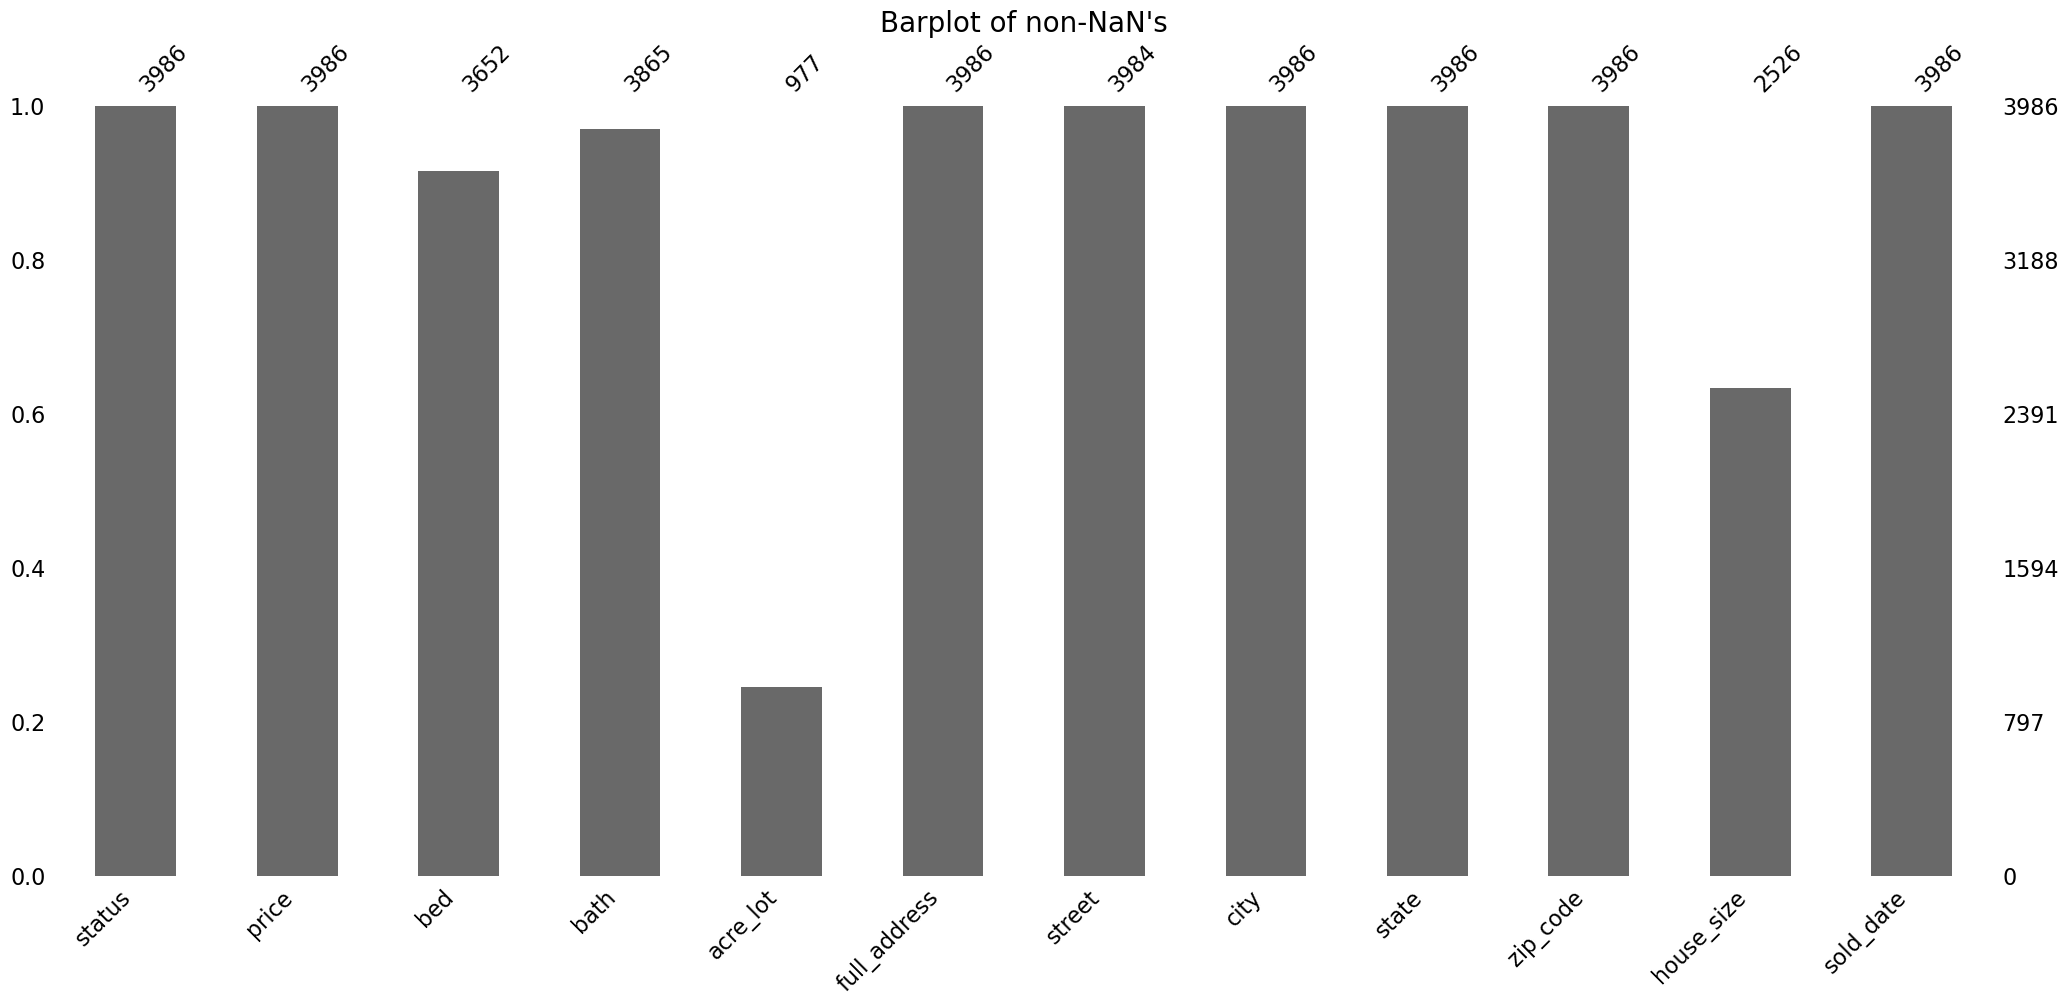

In [19]:
# Bar plot of NaN's
plt.rc("axes", titlesize=20)
msno.bar(df)
plt.title("Barplot of non-NaN's")

<AxesSubplot:>

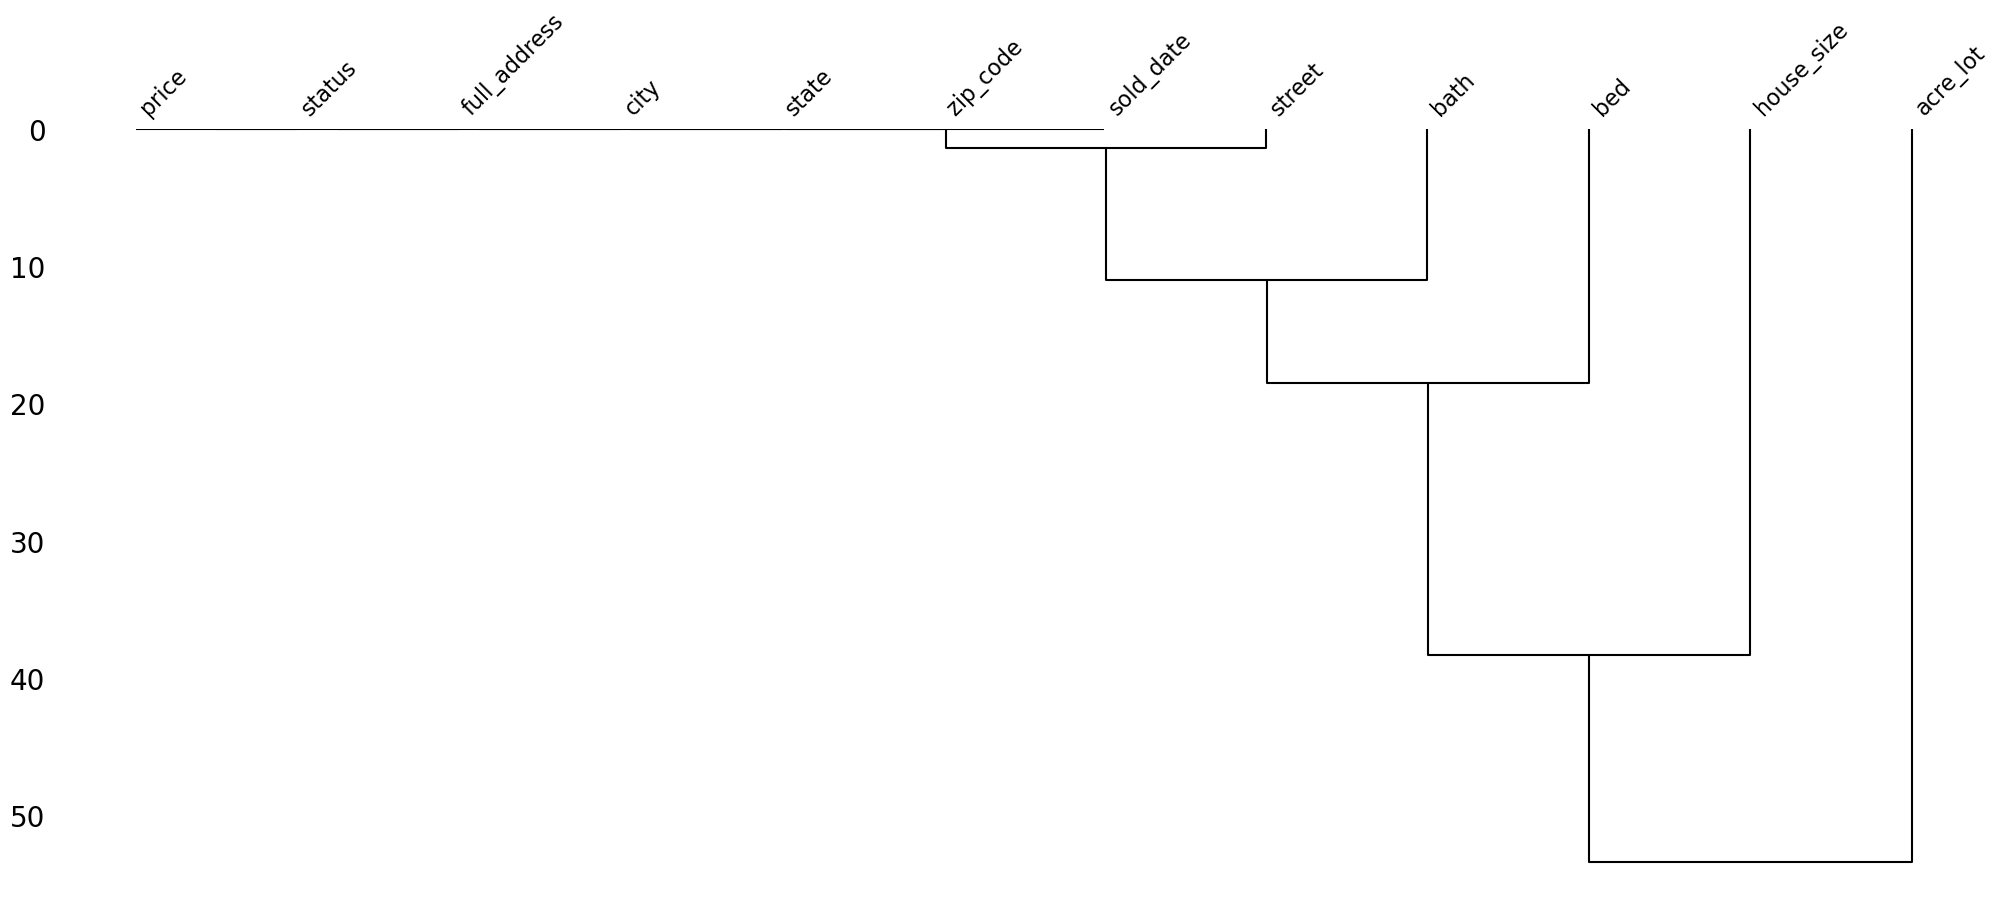

In [20]:
msno.dendrogram(df)

In [21]:
# Max Price
df['price'].max()

35000000.0

In [22]:
# Min Price
df['price'].min()

40000.0

In [23]:
# Price Range
df['price'].max() - df['price'].min()

34960000.0

In [24]:
# Create categorical price
def priceCat(df):
    priceCat_list = []
    
    for price in df['price']:
        if price < 10000:
            priceCat_list.append(0)
        elif price < 100000:
            priceCat_list.append(1)
        elif price < 1000000:
            priceCat_list.append(2)
        elif price < 10000000:
            priceCat_list.append(3)
        else:
            priceCat_list.append(4)
            
    return(priceCat_list)
        
df['price_cat'] = priceCat(df)
valid_df['price_cat'] = priceCat(valid_df)

In [25]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_cat
465547,for_sale,899000.0,2.0,2.0,NaN,"438 Clermont Ave Apt G, New York, NY, 11238",438 Clermont Ave Apt G,New York,New York,11238.0,NaN,2018-06-29,2
465602,for_sale,665000.0,1.0,1.0,NaN,"66 Madison Ave Apt 8D, New York, NY, 10016",66 Madison Ave Apt 8D,New York,New York,10016.0,NaN,2019-10-17,2
465779,for_sale,2850000.0,3.0,2.0,NaN,"470 W End Ave Unit 15B, New York, NY, 10024",470 W End Ave Unit 15B,New York,New York,10024.0,2018.0,2019-07-01,3
465783,for_sale,2650000.0,3.0,2.0,NaN,"1150 Fifth Ave Unit 7D, New York, NY, 10129",1150 Fifth Ave Unit 7D,New York,New York,10129.0,NaN,2019-08-02,3
465810,for_sale,2325000.0,2.0,2.0,NaN,"360 E 72nd St Apt B1209, New York, NY, 10021",360 E 72nd St Apt B1209,New York,New York,10021.0,NaN,2019-09-09,3


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986 entries, 465547 to 916347
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   status        3986 non-null   object        
 1   price         3986 non-null   float64       
 2   bed           3652 non-null   float64       
 3   bath          3865 non-null   float64       
 4   acre_lot      977 non-null    float64       
 5   full_address  3986 non-null   object        
 6   street        3984 non-null   object        
 7   city          3986 non-null   object        
 8   state         3986 non-null   object        
 9   zip_code      3986 non-null   float64       
 10  house_size    2526 non-null   float64       
 11  sold_date     3986 non-null   datetime64[ns]
 12  price_cat     3986 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 436.0+ KB


In [27]:
df.skew(axis = 0, skipna = True, numeric_only = True)

price         8.229803
bed           2.455761
bath          1.423172
acre_lot      3.790745
zip_code      1.099450
house_size    3.658787
price_cat     0.408868
dtype: float64

Some more data visualization and exploration was done on this dataset using non-Python software, such as Talbeau. Below are those visualizations

In [38]:
from IPython.display import Image
if RunMode == 'Jupyter':
    Image(r"./images/Avg Price vs Cities Bar.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/Avg Price vs Cities Bar.png")

In [39]:
if RunMode == 'Jupyter':
    Image(r"./images/Avg Price vs Cities Geo.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/Avg Price vs Cities Geo.png")

In [40]:
if RunMode == 'Jupyter':
    Image(r"./images/New York City Heat Map.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/New York City Heat Map.png")

In [41]:
if RunMode == 'Jupyter':
    Image(r"./images/Philadelphia Heat Map.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/Philadelphia Heat Map.png")

In [42]:
if RunMode == 'Jupyter':
    Image(r"./images/NY vs PA Sold Date vs Price.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NY vs PA Sold Date vs Price.png")

In [43]:
if RunMode == 'Jupyter':
    Image(r"./images/NYC vs Phili Sold Date vs Price.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NYC vs Phili Sold Date vs Price.png")

In [44]:
if RunMode == 'Jupyter':
    Image(r"./images/NY vs PA Bar Bath.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NY vs PA Bar Bath.png")

In [45]:
if RunMode == 'Jupyter':
    Image(r"./images/NY vs PA Bar Bed.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NY vs PA Bar Bed.png")

In [46]:
if RunMode == 'Jupyter':
    Image(r"./images/NY vs PA Price Bar.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NY vs PA Price Bar.png")

In [47]:
if RunMode == 'Jupyter':
    Image(r"./images/NY Vs Phili Bar (Bath).png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NY Vs Phili Bar (Bath).png")

In [48]:
if RunMode == 'Jupyter':
    Image(r"./images/NY Vs Phili Bar (Bed).png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NY Vs Phili Bar (Bed).png")

In [49]:
if RunMode == 'Jupyter':
    Image(r"./images/NYC Vs Phili Bar (Bed).png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NYC Vs Phili Bar (Bed).png")

In [50]:
if RunMode == 'Jupyter':
    Image(r"./images/NYC vs Phili Price Bar.png")
elif RunMode == 'Collab':
    Image(r"/content/drive/MyDrive/DSCI_592_Capstone_2/images/NYC vs Phili Price Bar.png")

In [28]:
# First we create a function to calculate all needed statistics for a feature and then return the dictionary
import scipy.stats

def get_statistics(df, feature):
    statistics = {}
    mean = np.mean(df[feature])
    stddev = np.std(df[feature])
    fifty_percentile = np.percentile(df[feature], 50)
    statistics['Mean'] = mean
    statistics['Standard Deviation'] = stddev
    statistics['50th Percentile'] = fifty_percentile
    return statistics

# Now we write a function that calculates the pearson correlation for two features
def pearson(df, feature1, feature2):
    x = df[feature1]
    y = df[feature2]
    return scipy.stats.pearsonr(x,y)
     

In [29]:
# Gathering statistics for all the continuous values in our dataset
price_stats = get_statistics(df, 'price')
print("Price Statistics")
print(f'Mean: {price_stats["Mean"]:.2f}')
print(f'Standard Deviation: {price_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {price_stats["50th Percentile"]:.2f}')
print()

acre_stats = get_statistics(df, 'acre_lot')
print("Acre Lot Statistics")
print(f'Mean: {acre_stats["Mean"]:.2f}')
print(f'Standard Deviation: {acre_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {acre_stats["50th Percentile"]:.2f}')
print()

house_size_stats = get_statistics(df, 'house_size')
print("House Size Statistics")
print(f'Mean: {house_size_stats["Mean"]:2f}')
print(f'Standard Deviation: {house_size_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {house_size_stats["50th Percentile"]:.2f}')

Price Statistics
Mean: 1381118.43
Standard Deviation: 2129536.67
50th Percentile: 826050.00

Acre Lot Statistics
Mean: 0.03
Standard Deviation: 0.03
50th Percentile: nan

House Size Statistics
Mean: 1361.787807
Standard Deviation: 904.36
50th Percentile: nan


### Processing

In [30]:
# Drop acre_lot column
df.drop(['acre_lot', 'full_address', 'street'],
        axis=1, inplace=True)

valid_df.drop(['acre_lot', 'full_address', 'street'],
        axis=1, inplace=True)

In [31]:
le = LabelEncoder()

cityLabel = le.fit_transform(df['city'])
stateLabel = le.fit_transform(df['state'])
df['city'] = cityLabel
df['state'] = stateLabel

In [32]:
cityLabel_V = le.fit_transform(valid_df['city'])
stateLabel_V = le.fit_transform(valid_df['state'])
valid_df['city'] = cityLabel_V
valid_df['state'] = stateLabel_V

In [33]:
df.head()

,status,price,bed,bath,city,state,zip_code,house_size,sold_date,price_cat
465547,for_sale,899000.0,2.0,2.0,0,0,11238.0,NaN,2018-06-29,2
465602,for_sale,665000.0,1.0,1.0,0,0,10016.0,NaN,2019-10-17,2
465779,for_sale,2850000.0,3.0,2.0,0,0,10024.0,2018.0,2019-07-01,3
465783,for_sale,2650000.0,3.0,2.0,0,0,10129.0,NaN,2019-08-02,3
465810,for_sale,2325000.0,2.0,2.0,0,0,10021.0,NaN,2019-09-09,3


In [34]:
# Drop null values
df = df.dropna()
valid_df = valid_df.dropna()

In [35]:
df.shape

(2256, 10)

In [36]:
valid_df.shape

(301, 10)

In [37]:
df.head()

,status,price,bed,bath,city,state,zip_code,house_size,sold_date,price_cat
465779,for_sale,2850000.0,3.0,2.0,0,0,10024.0,2018.0,2019-07-01,3
465815,for_sale,2785000.0,3.0,3.0,0,0,10065.0,1677.0,2018-02-12,3
466072,for_sale,699000.0,3.0,2.0,0,0,10032.0,1100.0,2019-07-12,2
466240,for_sale,4495000.0,2.0,2.0,0,0,10012.0,2000.0,2018-03-28,3
466258,for_sale,3775000.0,2.0,2.0,0,0,10007.0,1573.0,2018-09-05,3


In [38]:
df.sold_date.head()

465779   2019-07-01
465815   2018-02-12
466072   2019-07-12
466240   2018-03-28
466258   2018-09-05
Name: sold_date, dtype: datetime64[ns]

In [39]:
df.sold_date.head()

465779   2019-07-01
465815   2018-02-12
466072   2019-07-12
466240   2018-03-28
466258   2018-09-05
Name: sold_date, dtype: datetime64[ns]

In [40]:
def total_days(df):
    totalDays = []
    dayZero_String = "2018-01-01"
    dayZero_format = "%Y-%m-%d"
    dayZero = datetime.datetime.strptime(dayZero_String, dayZero_format)
    
    for el in df:
        timedelta = el - dayZero
        totalDays.append(timedelta.total_seconds() * 0.00001157)
        
    return(totalDays)

In [41]:
temp = total_days(df['sold_date'])
df['sold_date'] = temp

In [42]:
temp = total_days(valid_df['sold_date'])
valid_df['sold_date'] = temp

In [43]:
df.head()

,status,price,bed,bath,city,state,zip_code,house_size,sold_date,price_cat
465779,for_sale,2850000.0,3.0,2.0,0,0,10024.0,2018.0,545.807808,3
465815,for_sale,2785000.0,3.0,3.0,0,0,10065.0,1677.0,41.985216,3
466072,for_sale,699000.0,3.0,2.0,0,0,10032.0,1100.0,556.803936,2
466240,for_sale,4495000.0,2.0,2.0,0,0,10012.0,2000.0,85.969728,3
466258,for_sale,3775000.0,2.0,2.0,0,0,10007.0,1573.0,246.913056,3


### Correlation

In [44]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
price_cat     0.584201
house_size    0.478826
bath          0.430591
bed           0.114842
sold_date    -0.103990
city         -0.362130
state        -0.362130
zip_code     -0.365615
Name: price, dtype: float64

<AxesSubplot:>

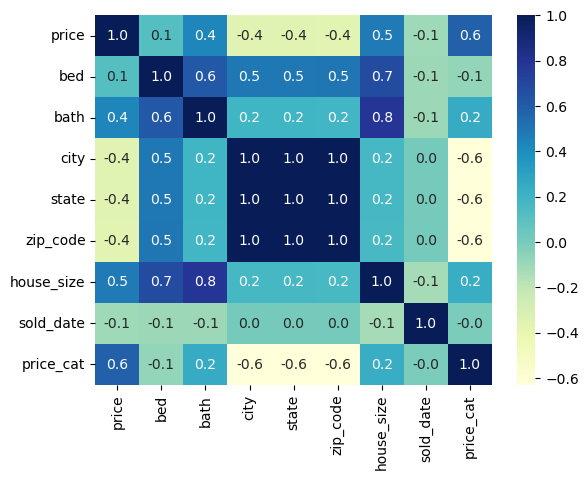

In [45]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".1f")

In [46]:
for (columnName, columnData) in df.iteritems():
    corr, _ = pearsonr(df[columnName], df['price'])
    print('The Pearson Coefficient between ' + str(columnName) + ' and price is ' + str(corr))
    corr, _ = spearmanr(df[columnName], df['price'])
    print('The Spearman Coefficient between ' + str(columnName) + ' and price is ' + str(corr))
    print()

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


The Pearson Coefficient between status and price is nan
The Spearman Coefficient between status and price is nan

The Pearson Coefficient between price and price is 0.9999999999999996
The Spearman Coefficient between price and price is 1.0

The Pearson Coefficient between bed and price is 0.11484166431062226
The Spearman Coefficient between bed and price is -0.2059085188586301

The Pearson Coefficient between bath and price is 0.43059085421118204
The Spearman Coefficient between bath and price is 0.277774142567818

The Pearson Coefficient between city and price is -0.36213034272418726
The Spearman Coefficient between city and price is -0.7771559477180975

The Pearson Coefficient between state and price is -0.36213034272418726
The Spearman Coefficient between state and price is -0.7771559477180975

The Pearson Coefficient between zip_code and price is -0.3656152668317615
The Spearman Coefficient between zip_code and price is -0.7698656364389044

The Pearson Coefficient between house_siz

### Feature Selection

In [47]:
df.drop(['status','city', 'state'],
        axis=1, inplace=True)

valid_df.drop(['status','city', 'state'],
        axis=1, inplace=True)

In [48]:
reg_df = df.drop(['price_cat'], axis=1)
valid_reg_df = valid_df.drop(['price_cat'], axis=1)

In [49]:
cat_df = df.drop(['price'],
        axis=1)
valid_cat_df = valid_df.drop(['price'],
        axis=1)

### Stratifying and Splitting Data into Train and Test Data

In [111]:
# For regression models
reg_df.head()

,price,bed,bath,zip_code,house_size,sold_date
465779,2850000.0,3.0,2.0,10024.0,2018.0,545.807808
465815,2785000.0,3.0,3.0,10065.0,1677.0,41.985216
466072,699000.0,3.0,2.0,10032.0,1100.0,556.803936
466240,4495000.0,2.0,2.0,10012.0,2000.0,85.969728
466258,3775000.0,2.0,2.0,10007.0,1573.0,246.913056


In [112]:
# For categorical models
cat_df.head()

,bed,bath,zip_code,house_size,sold_date,price_cat
465779,3.0,2.0,10024.0,2018.0,545.807808,3
465815,3.0,3.0,10065.0,1677.0,41.985216,3
466072,3.0,2.0,10032.0,1100.0,556.803936,2
466240,2.0,2.0,10012.0,2000.0,85.969728,3
466258,2.0,2.0,10007.0,1573.0,246.913056,3


In [113]:
reg_df.shape

(2256, 6)

In [114]:
cat_df.shape

(2256, 6)

In [115]:
# for regression models
regx_train, regx_test, regy_train, regy_test = train_test_split(reg_df.drop('price', axis=1), 
                                                    reg_df['price'], test_size=0.33, random_state = 10)
print(regx_train.shape, regx_test.shape)
print(regy_train.shape, regy_test.shape)

(1511, 5) (745, 5)
(1511,) (745,)


In [116]:
# for categorical models 
catx_train, catx_test, caty_train, caty_test = train_test_split(cat_df.drop('price_cat', axis=1), 
                                                    cat_df['price_cat'], test_size=0.33, random_state = 10)
print(catx_train.shape, catx_test.shape)
print(caty_train.shape, caty_test.shape)

(1511, 5) (745, 5)
(1511,) (745,)


In [117]:
vregx_train, vregx_test, vregy_train, vregy_test = train_test_split(valid_reg_df.drop('price', axis=1), 
                                                    valid_reg_df['price'], test_size=0.33, random_state = 10)
vcatx_train, vcatx_test, vcaty_train, vcaty_test = train_test_split(valid_cat_df.drop('price_cat', axis=1), 
                                                    valid_cat_df['price_cat'], test_size=0.33, random_state = 10)

### Feature Scaling

In [118]:
scaler = StandardScaler()
regx_train = scaler.fit_transform(regx_train)
catx_train = scaler.fit_transform(catx_train)

regx_test = scaler.transform(regx_test)
catx_test = scaler.transform(catx_test)

vregx_train = scaler.fit_transform(vregx_train)
vcatx_train = scaler.fit_transform(vcatx_train)
vregx_test = scaler.transform(vregx_test)
vcatx_test = scaler.transform(vcatx_test)

## Machine Learning Algorithms

### Logistic Regression

In [61]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, f_classif, chi2
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [62]:
lr_model = LogisticRegression(max_iter=150)
lr_model.fit(catx_train, caty_train)
lry_pred = lr_model.predict(catx_test)

In [63]:
lr_accuracy = accuracy_score(lry_pred, caty_test)
model_accuracy = {'Log_Reg': lr_accuracy}
print(f"Logistic regression accuracy: {lr_accuracy}")

Logistic regression accuracy: 0.8187919463087249


#### Confusion Matrix

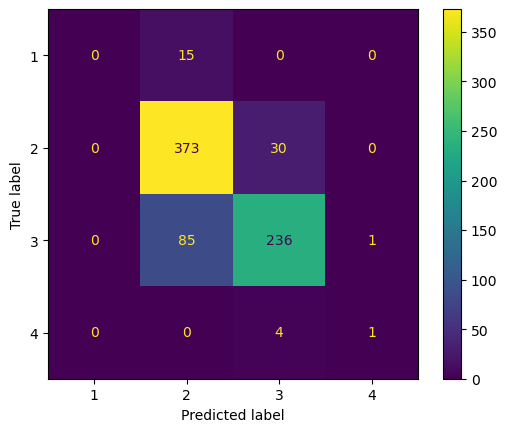

In [64]:
lr_cm = confusion_matrix(caty_test, lry_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### Multiple Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
linr_model = LinearRegression()
linr_model.fit(regx_train, regy_train)
model_accuracy['Lin_Reg'] = linr_model.score(regx_test, regy_test)
print(linr_model.score(regx_test, regy_test))

0.5193123723368086


In [67]:
regx_test.shape

(745, 5)

In [68]:
regy_test.shape

(745,)

In [69]:
linry_pred = linr_model.predict(regx_test)

linr_diff = pd.DataFrame({'Actual value': regy_test,
                         'Predicted value': linry_pred})
linr_diff.head()

,Actual value,Predicted value
541783,1100000.0,1.241376e+06
829237,1150000.0,2.000617e+06
768220,8495000.0,4.551977e+06
776314,10500000.0,5.112458e+06
756182,3250000.0,3.716847e+06


In [70]:
linr_meanAbErr = mean_absolute_error(regy_test, linry_pred)
linr_meanSqErr = mean_squared_error(regy_test, linry_pred)
linr_rootMeanSqErr = np.sqrt(linr_meanSqErr)

print('Mean Absolute Error:', linr_meanAbErr)
print('Mean Square Error:', linr_meanSqErr)
print('Root Mean Square Error:', linr_rootMeanSqErr)

Mean Absolute Error: 814421.2427145267
Mean Square Error: 1657759076844.7983
Root Mean Square Error: 1287539.932136009


In [71]:
priceRange = df['price'].max() - df['price'].min()

print('Normalized Mean Absolute Error:', linr_meanAbErr/priceRange)
print('Normalized Mean Square Error:', linr_meanSqErr/priceRange)
print('Normalized Root Mean Square Error:', linr_rootMeanSqErr/priceRange)

Normalized Mean Absolute Error: 0.023312472955904585
Normalized Mean Square Error: 47452.671442530365
Normalized Root Mean Square Error: 0.036855300762444795


### Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(catx_train, caty_train)
dtcy_pred = dtc_model.predict(catx_test)

In [108]:
dtc_accuracy = accuracy_score(dtcy_pred, caty_test)
model_accuracy['DTC'] = dtc_accuracy
print(f"Decision tree classification accuracy: {dtc_accuracy}")

Decision tree classification accuracy: 0.978523489932886


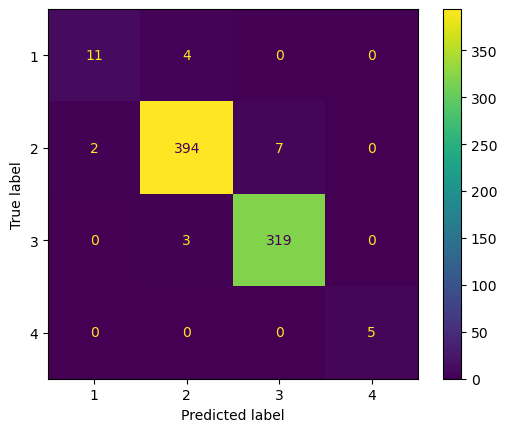

In [109]:
dtc_cm = confusion_matrix(caty_test, dtcy_pred, labels=dtc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=dtc_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [76]:
cat_df.head()

,bed,bath,zip_code,house_size,sold_date,price_cat
465779,3.0,2.0,10024.0,2018.0,545.807808,3
465815,3.0,3.0,10065.0,1677.0,41.985216,3
466072,3.0,2.0,10032.0,1100.0,556.803936,2
466240,2.0,2.0,10012.0,2000.0,85.969728,3
466258,2.0,2.0,10007.0,1573.0,246.913056,3


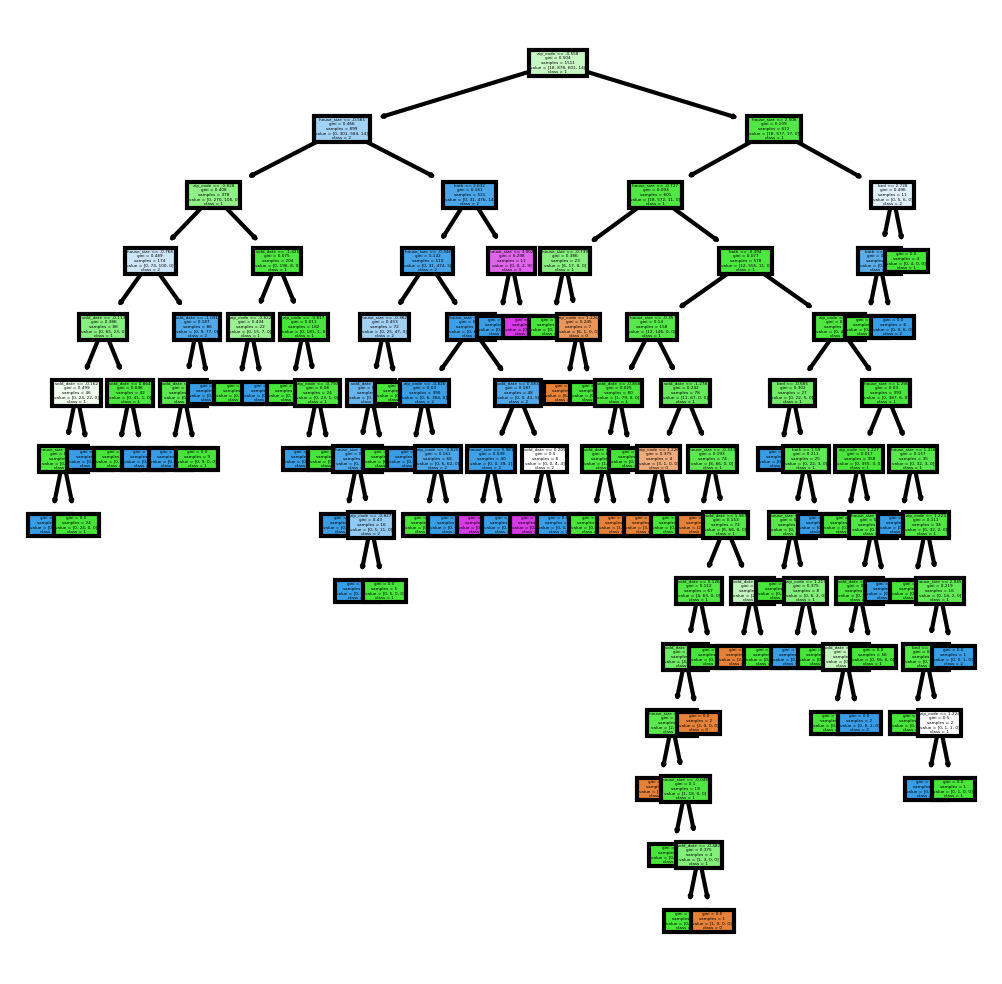

In [77]:
from sklearn import tree

fn = ['bed', 'bath', 'zip_code', 'house_size', 'sold_date']
cn = ['0', '1', '2', '3', '4']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtc_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

### Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(regx_train, regy_train)
dtry_pred = dtr_model.predict(regx_test)

In [120]:
dtr_accuracy = accuracy_score(dtry_pred, regy_test)
model_accuracy['DTR'] = dtr_accuracy
print(f"Decision tree classification accuracy: {dtr_accuracy}")

Decision tree classification accuracy: 0.8456375838926175


In [121]:
from sklearn.metrics import r2_score
model_accuracy['DTR_R2'] = r2_score(regy_test, dtry_pred)
r2_score(regy_test, dtry_pred)

0.9852825565825563

### XGBoost

In [81]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(regx_train, regy_train)

[23:33:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [82]:
# Make predictionss
y_pred = xg_reg.predict(regx_test)

In [83]:
xgb_meanAbErr = mean_absolute_error(regy_test, y_pred)
xgb_meanSqErr = mean_squared_error(regy_test, y_pred)
xgb_rootMeanSqErr = np.sqrt(xgb_meanSqErr)

print('Mean Absolute Error:', xgb_meanAbErr/priceRange)
print('Mean Square Error:', xgb_meanSqErr/priceRange)
print('Root Mean Square Error:', xgb_rootMeanSqErr/priceRange)

Mean Absolute Error: 0.024002902339964056
Mean Square Error: 68306.78273942
Root Mean Square Error: 0.04421824905111156


### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_model = RandomForestClassifier()
rf_model.fit(catx_train, caty_train)
rfy_pred = rf_model.predict(catx_test)

In [86]:
rf_accuracy = accuracy_score(rfy_pred, caty_test)
model_accuracy['Random Forest'] = rf_accuracy
print(f"Random Forrest accuracy: {rf_accuracy}")

Random Forrest accuracy: 0.9812080536912752


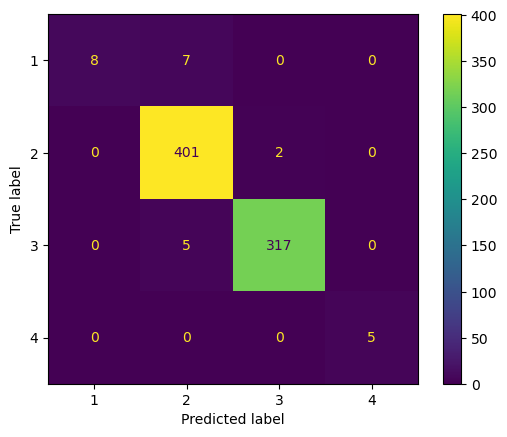

In [87]:
# Confusion Matrix

rf_cm = confusion_matrix(caty_test, rfy_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [123]:
for key in model_accuracy:
    print(f"{key} : {model_accuracy[key]}")

Log_Reg : 0.8187919463087249
Lin_Reg : 0.5193123723368086
DTC : 0.978523489932886
DTR : 0.8456375838926175
DTR_R2 : 0.9852825565825563
Random Forest : 0.9812080536912752


The two models to continue on with are thus Random Forest and DTC/DTR

In [124]:
#dtr_model.fit(vregx_train, vregy_train)
dtrv_pred = dtr_model.predict(vregx_test)
r2_score(vregy_test, dtrv_pred)

0.12052852724952168

In [130]:
dtrv_pred1 = dtr_model.predict(vregx_test)
dtrv_accuracy = accuracy_score(dtrv_pred1, vregy_test)
print(f"Decision tree regressor accuracy: {dtrv_accuracy}")

Decision tree regressor accuracy: 0.0


In [126]:
dtcv_pred = dtc_model.predict(vcatx_test)
dtc_VAccuracy = accuracy_score(dtcv_pred, vcaty_test)
print(f"Decision tree classification accuracy: {dtc_VAccuracy}")

Decision tree classification accuracy: 0.76


In [127]:
#rf_model.fit(vcatx_train, vcaty_train)
rfv_pred = rf_model.predict(vcatx_test)
rf_VAccuracy = accuracy_score(rfv_pred, vcaty_test)
print(f"Random Forest accuracy: {rf_VAccuracy}")

Random Forest accuracy: 0.87


In [128]:
lrv_pred = lr_model.predict(vcatx_test)
lr_VAccuracy = accuracy_score(lrv_pred, vcaty_test)
print(f"Logistic regression accuracy: {lr_VAccuracy}")

Logistic regression accuracy: 0.79


In [129]:
def prediction(model, bed, bath, zip, size, date):
    dayZero_String = "2020-01-01"
    dayZero_format = "%Y-%m-%d"
    dayZero = datetime.datetime.strptime(dayZero_String, dayZero_format)
    timedelta = date - dayZero
    days_date = timedelta.total_seconds() * 0.00001157

    model.fit([bed, bath, zip, size, days_date])